# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | guymon
Processing Record 3 of Set 1 | santa marta
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | laojunmiao
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | mccook
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | pachino
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | rio grande
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | robore
Processing Record 22 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,268.06,68,75,5.14,SJ,1706661374
1,guymon,36.6828,-101.4816,289.15,36,0,2.06,US,1706661460
2,santa marta,11.2408,-74.1990,301.42,71,54,6.17,CO,1706661460
3,invercargill,-46.4000,168.3500,290.94,77,92,5.81,NZ,1706661460
4,waitangi,-43.9535,-176.5597,290.83,97,100,2.24,NZ,1706661460


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,268.06,68,75,5.14,SJ,1706661374
1,guymon,36.6828,-101.4816,289.15,36,0,2.06,US,1706661460
2,santa marta,11.2408,-74.1990,301.42,71,54,6.17,CO,1706661460
3,invercargill,-46.4000,168.3500,290.94,77,92,5.81,NZ,1706661460
4,waitangi,-43.9535,-176.5597,290.83,97,100,2.24,NZ,1706661460


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

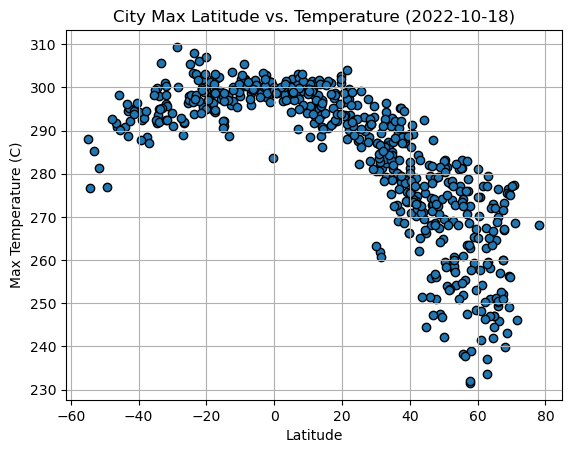

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

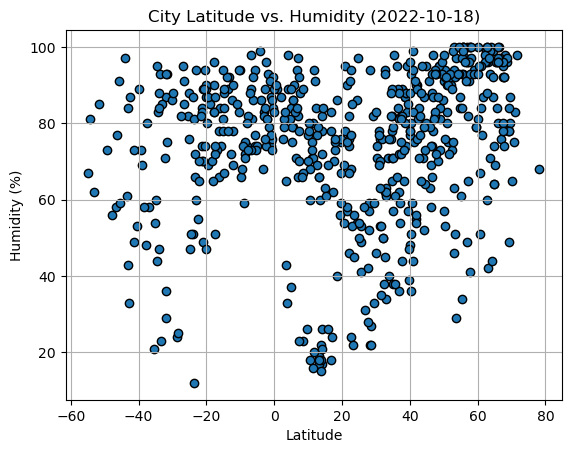

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

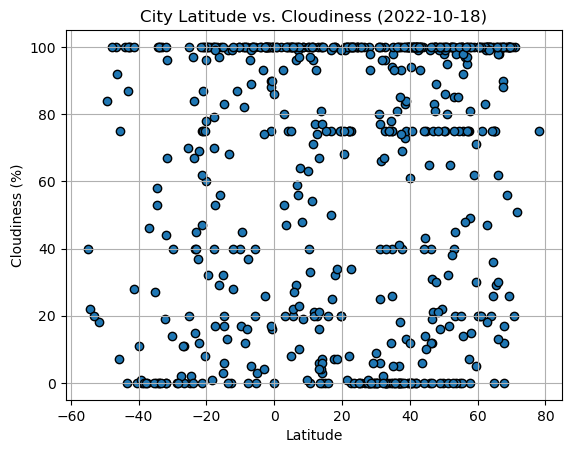

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

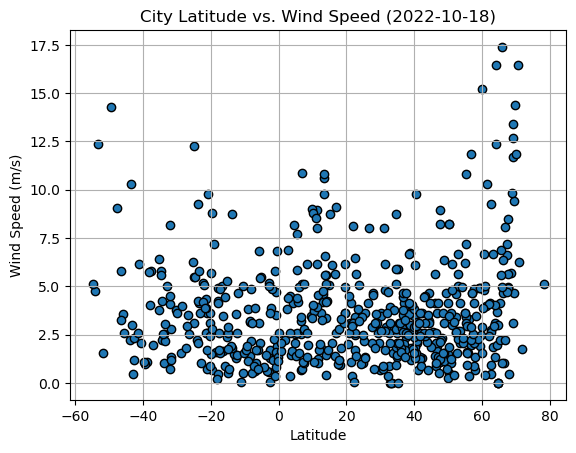

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    # Create a linear regression line using the slope and intercept
    line = slope * np.array(x) + intercept

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
cities = ['New York', 'London', 'Paris', 'Berlin', 'Moscow', 'Tokyo', 'Seoul', 'Beijing']

# Define a list to store the data for each city
data = []

# Loop through each city and make an API request
for city in cities:
    params = {'q': city, 'appid': weather_api_key, 'units': 'metric'}
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Check for errors in the response
        city_data = response.json()
        if 'cod' in city_data and city_data['cod'] == 200:
            numeric_data = {
                'City': city,
                'Temperature (Celsius)': city_data['main']['temp'],
                'Max Temperature (Celsius)': city_data['main']['temp_max'],
                'Humidity (%)': city_data['main']['humidity'],
                'Cloudiness (%)': city_data['clouds']['all'],
                'Wind Speed (m/s)': city_data['wind']['speed'],
                'Latitude': city_data['coord']['lat'],
                'Longitude': city_data['coord']['lon'],
                'Date': pd.to_datetime(city_data['dt'], unit='s'),
            }
            data.append(numeric_data)
        else:
            print(f"Error fetching data for {city}: {city_data.get('message', 'Unknown error')}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {city}: {e}")

northern_hemi_df = pd.DataFrame(data)
northern_hemi_df.head()

,City,Temperature (Celsius),Max Temperature (Celsius),Humidity (%),Cloudiness (%),Wind Speed (m/s),Latitude,Longitude,Date
0,New York,1.90,2.97,81,100,4.63,40.7143,-74.0060,2024-01-31 01:39:55
1,London,6.79,7.52,80,100,1.34,51.5085,-0.1257,2024-01-31 01:38:21
2,Paris,6.51,7.88,78,100,1.54,48.8534,2.3488,2024-01-31 01:40:15
3,Berlin,8.22,9.62,80,100,6.26,52.5244,13.4105,2024-01-31 01:38:36
4,Moscow,-0.79,-0.71,100,98,0.78,55.7522,37.6156,2024-01-31 01:41:44


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
cities = ['Sydney', 'Santiago', 'Cape Town', 'Buenos Aires', 'Rio de Janeiro', 'Auckland', 'Perth', 'Johannesburg']

# Define a list to store the data for each city
data = []

for city in cities:
    params = {'q': city, 'appid': weather_api_key, 'units': 'metric'}
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Check for errors in the response
        city_data = response.json()
        if 'cod' in city_data and city_data['cod'] == 200:
            numeric_data = {
                'City': city,
                'Temperature (Celsius)': city_data['main']['temp'],
                'Max Temperature (Celsius)': city_data['main']['temp_max'],
                'Humidity (%)': city_data['main']['humidity'],
                'Cloudiness (%)': city_data['clouds']['all'],
                'Wind Speed (m/s)': city_data['wind']['speed'],
                'Latitude': city_data['coord']['lat'],
                'Longitude': city_data['coord']['lon'],
                'Date': pd.to_datetime(city_data['dt'], unit='s'),
            }
            data.append(numeric_data)
        else:
            print(f"Error fetching data for {city}: {city_data.get('message', 'Unknown error')}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {city}: {e}")

southern_hemi_df = pd.DataFrame(data)
southern_hemi_df.head()

,City,Temperature (Celsius),Max Temperature (Celsius),Humidity (%),Cloudiness (%),Wind Speed (m/s),Latitude,Longitude,Date
0,Sydney,26.08,27.06,75,75,7.72,-33.8679,151.2073,2024-01-31 01:36:39
1,Santiago,26.17,27.70,35,0,3.60,-33.4569,-70.6483,2024-01-31 01:37:07
2,Cape Town,19.13,22.55,80,0,1.03,-33.9258,18.4232,2024-01-31 01:45:00
3,Buenos Aires,28.37,29.41,63,0,2.06,-34.6132,-58.3772,2024-01-31 01:47:02
4,Rio de Janeiro,26.98,26.98,83,40,4.12,-22.9028,-43.2075,2024-01-31 01:46:07


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.02536033039868836


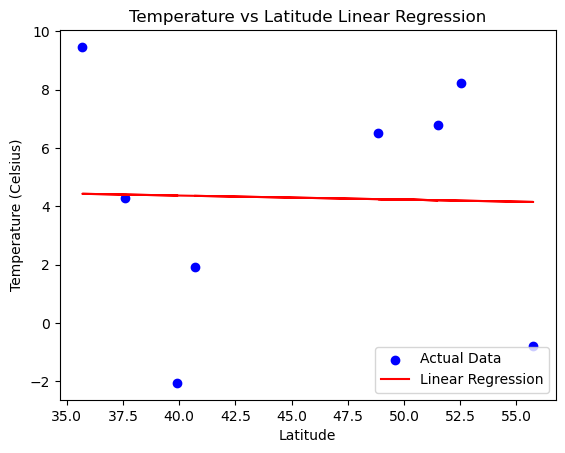

In [73]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Latitude'], northern_hemi_df['Temperature (Celsius)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * northern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(northern_hemi_df['Latitude'], northern_hemi_df['Temperature (Celsius)'], color='blue', label='Actual Data')
plt.plot(northern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

The r-value is -0.27398320249365166


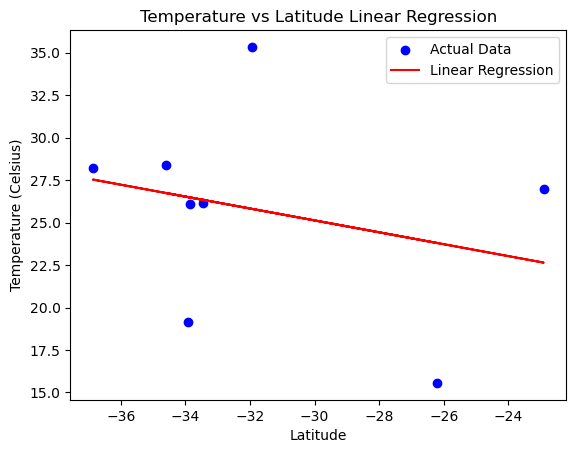

In [74]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Latitude'], southern_hemi_df['Temperature (Celsius)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * southern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(southern_hemi_df['Latitude'], southern_hemi_df['Temperature (Celsius)'], color='blue', label='Actual Data')
plt.plot(southern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.8272975354734191


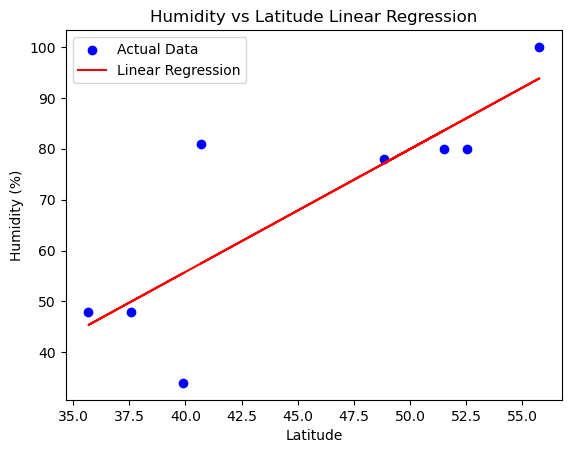

In [77]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Latitude'], northern_hemi_df['Humidity (%)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * northern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(northern_hemi_df['Latitude'], northern_hemi_df['Humidity (%)'], color='blue', label='Actual Data')
plt.plot(northern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

The r-value is 0.4431037726491664


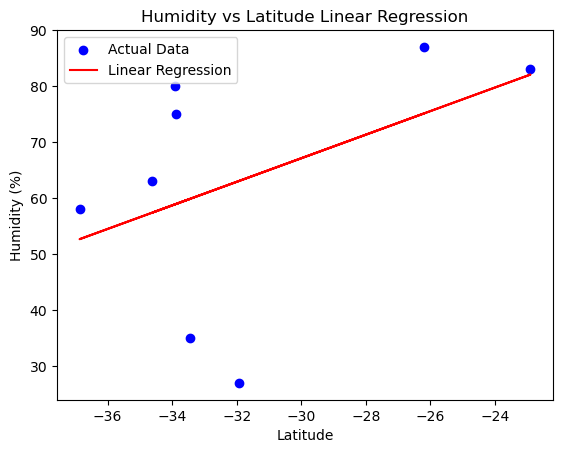

In [78]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Latitude'], southern_hemi_df['Humidity (%)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * southern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(southern_hemi_df['Latitude'], southern_hemi_df['Humidity (%)'], color='blue', label='Actual Data')
plt.plot(southern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.6810017045285718


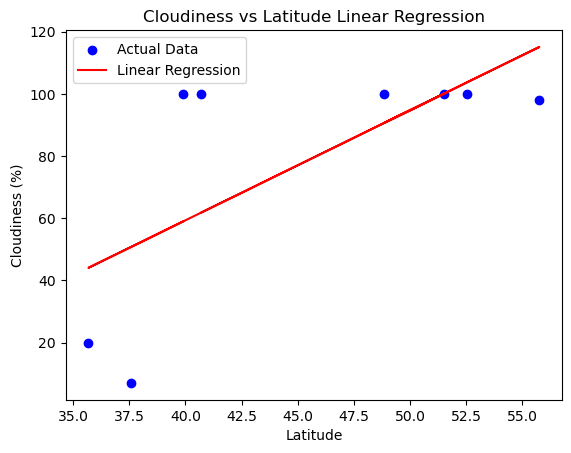

In [81]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness (%)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * northern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness (%)'], color='blue', label='Actual Data')
plt.plot(northern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

The r-value is 0.21013645254608104


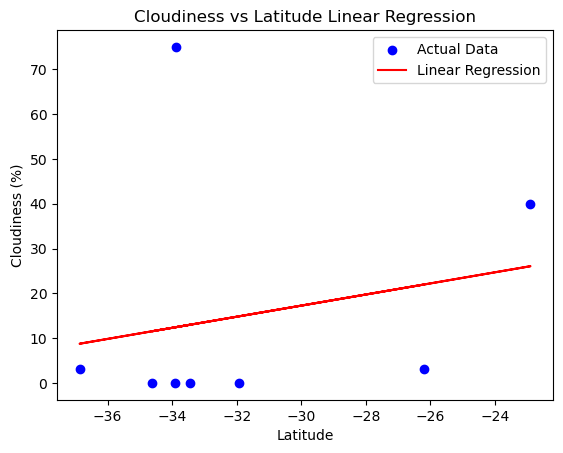

In [80]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Latitude'], southern_hemi_df['Cloudiness (%)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * southern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(southern_hemi_df['Latitude'], southern_hemi_df['Cloudiness (%)'], color='blue', label='Actual Data')
plt.plot(southern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.018304119146105365


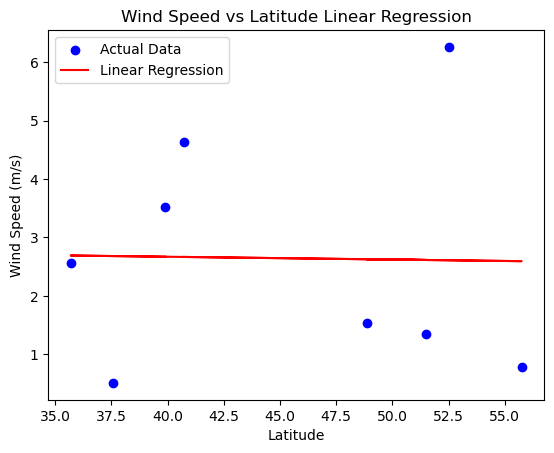

In [82]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed (m/s)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * northern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed (m/s)'], color='blue', label='Actual Data')
plt.plot(northern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

The r-value is -0.19901605889175397


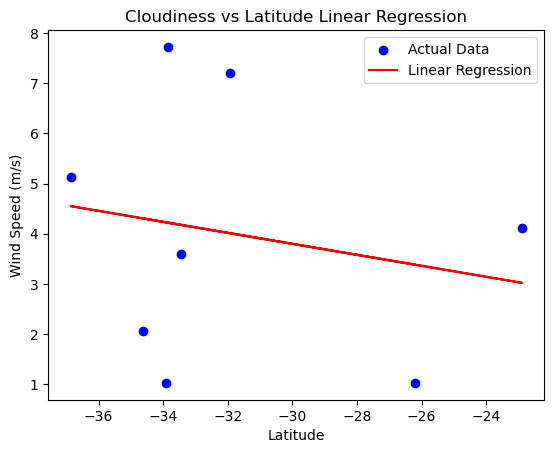

In [83]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed (m/s)'])
print(f'The r-value is {r_value}')
# Create a regression line
regression_line = slope * southern_hemi_df['Latitude'] + intercept

# Plotting the data and regression line
plt.scatter(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed (m/s)'], color='blue', label='Actual Data')
plt.plot(southern_hemi_df['Latitude'], regression_line, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Cloudiness vs Latitude Linear Regression')
plt.legend()

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE